# **Kelompok 6 - Data Science Salaries EDA Visualization and Prediction**

Pada notebook ini, kami akan mendalami dan memvisualisasikan dataset penghasilan Data Science dari [kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023). Dataset ini berisi data menyeluruh mengenai penghasilan dari berbagai pekerjaan dalam bidang Data Science .

Anggota Kelompok 6:
- Arka Brian Dewara 2106731421
- Ibrahim Rijal 2106633323
- Luthfi Misbachul Munir 2106631961
- Raditya Ihsan Dhiaulhaq 2106733912
- Rizki Awanta Jordhie 2106655034


## **Data Science Salaries 2023 Dataset**

Dataset ini berisi 11 kolom/fitur, yaitu:

 ***work_year***: Tahun gaji dibayarkan.

 ***experience_level***: Tingkat pengalaman dalam pekerjaan selama tahun tersebut
* **EN**, merujuk pada Tingkat Awal / Junior.
* **MI**, merujuk pada Tingkat Menengah / Intermediate.
* **SE**, merujuk pada Tingkat Senior / Ahli.
* **EX**, merujuk pada Tingkat Eksekutif / Direktur.


 ***employment_type***: Jenis pekerjaan untuk peran tersebut
* **PT**, merujuk pada Paruh waktu
* **FT**, merujuk pada Penuh waktu
* **CT**, merujuk pada Kontrak
* **FL**, merujuk pada Freelance


 ***job_title***: Peran yang dikerjakan selama tahun tersebut.

 ***salary***: Jumlah gaji kotor yang dibayarkan.

 ***salary_currency***: Mata uang gaji yang dibayarkan dalam kode mata uang ISO 4217.

 ***salaryinusd***: Gaji dalam USD

 ***employee_residence***: Negara tempat tinggal utama karyawan selama tahun kerja dalam kode negara ISO 3166.

 ***remote_ratio***: Jumlah pekerjaan yang dilakukan secara remote secara keseluruhan

 ***company_location***: Negara tempat kantor utama pengusaha atau cabang kontrak berada

 ***company_size***: Jumlah median orang yang bekerja untuk perusahaan selama tahun tersebut

Data Analysis dapat dimulai dengan import library yang akan kita butuhkan serta download datasetnya dari kaggle.

### Import Library yang dibutuhkan

Cara menggunakan notebook pada google colab:
1. Lampirkan API key `kaggle.json` anda pada home folder dari colab
* ![](https://hackmd.io/_uploads/Hkt4vrldn.png)
2. Anda dapat melakukan run all pada colab

**Library yang Digunakan**

Berikut adalah daftar library yang digunakan dalam kode ini:

1. **numpy**: Library untuk komputasi numerik pada Python. Digunakan untuk manipulasi data array, perhitungan statistik, dan aljabar linear.

   ```python
   from numpy import array
   from numpy import mean
   from numpy import cov
   import numpy as np
   from numpy.linalg import eig
   ```

2. **pandas**: Library untuk analisis data yang menyediakan struktur data yang efisien dan fleksibel. Digunakan untuk membaca dan memanipulasi data tabular.
   ```python
   import pandas as pd
   ```

3. **matplotlib**: Library untuk visualisasi data dengan menggunakan grafik dan plot. Digunakan untuk membuat visualisasi yang dapat dipersonalisasi.
   ```python
   import matplotlib.pyplot as plt
   ```

4. **seaborn**: Library yang dibangun di atas matplotlib untuk visualisasi data statistik. Digunakan untuk menghasilkan visualisasi data yang lebih menarik dan informatif.
   ```python
   import seaborn as sns
   ```

5. **chart_studio.plotly**: Library untuk membuat grafik interaktif dan visualisasi data. Digunakan untuk menghasilkan grafik Plotly yang interaktif.
   ```python
   import chart_studio.plotly as py
   ```

6. **plotly.graph_objects**: Library untuk membuat grafik interaktif dan visualisasi data. Digunakan untuk membuat grafik Plotly yang disesuaikan.
   ```python
   import plotly.graph_objects as go
   ```

7. **pandas_profiling**: Library untuk menghasilkan laporan otomatis yang mendetail tentang dataset. Digunakan untuk melakukan analisis eksplorasi data secara cepat.
   ```python
   from pandas_profiling import ProfileReport
   ```

8. **time**: Library untuk mengukur waktu dan mengatur penundaan dalam program Python. Digunakan untuk mengukur waktu eksekusi kode.
   ```python
   import time
   ```

9. **tensorflow**: Library untuk komputasi numerik yang kuat dan efisien. Digunakan untuk mengimplementasikan dan melatih model machine learning.
   ```python
   import tensorflow as tf
   ```

Pastikan library-library ini telah diinstal dan sudah di run importnya sebelum menjalankan kode.

In [ ]:
%pip install kaggle
%pip install chart_studio
%pip install plotly
%pip install tensorflow
%pip install pandas-profiling
%pip install pycountry

In [2]:
from numpy import array
from numpy import mean
from numpy import cov
import numpy as np
from numpy.linalg import eig
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import pycountry
import time
import tensorflow as tf

C:\Users\Arka Brian\AppData\Local\Temp\ipykernel_9244\2883937019.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
print(tf.__version__)

2.12.0


### Import data dari Kaggle

In [4]:
%mkdir ~/.kaggle
%cp kaggle.json ~/.kaggle
%chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
UsageError: Line magic function `%cp` not found.


In [5]:
%kaggle datasets download arnabchaki/data-science-salaries-2023
%unzip data-science-salaries-2023.zip

UsageError: Line magic function `%kaggle` not found.


## Data Preparation and Cleaning

In [6]:
data = pd.read_csv("ds_salaries.csv")
# view the first 5 rows of data

data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
#view the shape of data

print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 3755
Number of columns 11


In [9]:
#view the features

print("Data Features:\n",data.columns.values)

Data Features:
 ['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']


In [10]:
#datatype of each feature

print(data.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [11]:
# the missing values in each column

print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [12]:
#number of unique values for each feature

print(data.nunique())

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


## **Exploratory Data Analysis and Visualization**



Berikut adalah informasi statistik dan visualisasi yang didapat dari dataset penghasilan data science:

In [13]:
#statistical info about the data

data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [14]:
data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [15]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Top 10 Pekerjaan Berdasarkan Jumlah Pegawai



In [16]:
job_titles = data.job_title.value_counts().head(10)

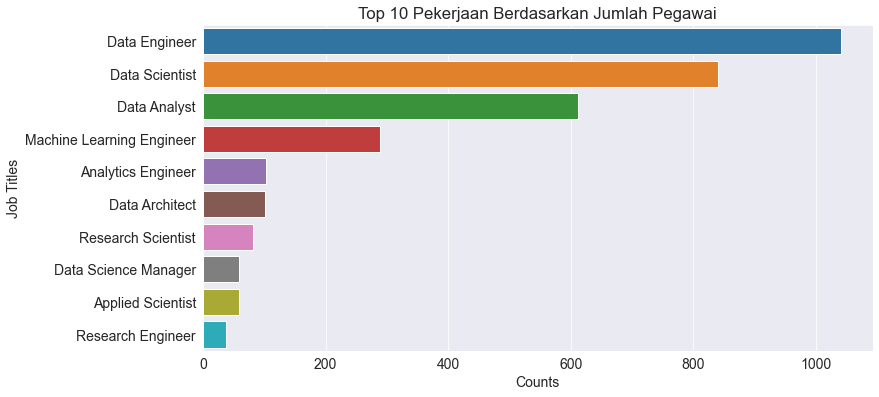

In [17]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("Top 10 Pekerjaan Berdasarkan Jumlah Pegawai")
plt.ylabel('Job Titles')
plt.xlabel('Counts')

sns.barplot(y=job_titles.index, x= job_titles.values);

### Top 20 Pekerjaan Berdasarkan Penghasilan


In [18]:
job_titles_salaries = data[['job_title','salary_in_usd']]


job_titles_salaries = job_titles_salaries.groupby(data['job_title']).mean().round(0).head(20).sort_values('salary_in_usd',ascending = False).reset_index()

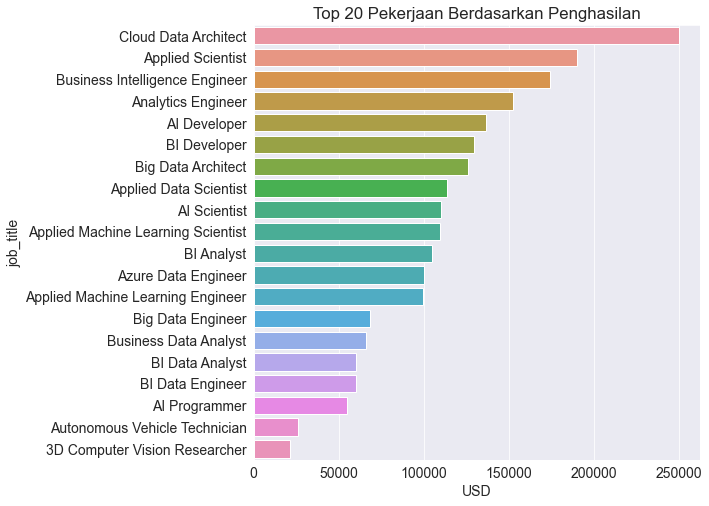

In [19]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=0)
plt.title("Top 20 Pekerjaan Berdasarkan Penghasilan")
plt.ylabel('Job Titles')
plt.xlabel('USD')

sns.barplot(data=job_titles_salaries,x=job_titles_salaries.salary_in_usd.values,y=job_titles_salaries.job_title);

### Top 10 Negara dengan Pekerja Data Science

In [20]:
countries = data.employee_residence.value_counts().head(10)

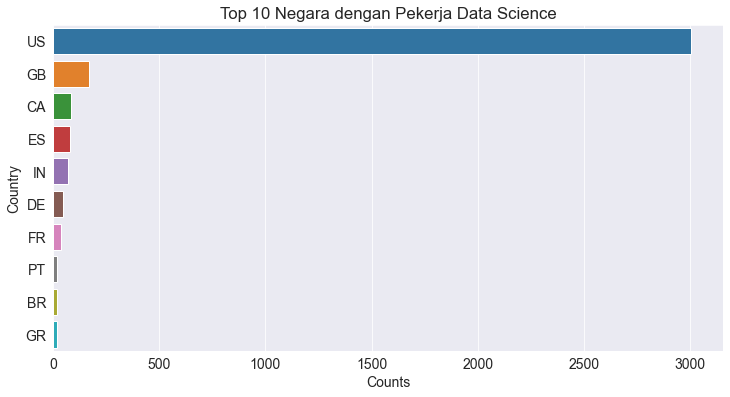

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("Top 10 Negara dengan Pekerja Data Science")
plt.ylabel('Country')
plt.xlabel('Counts')

sns.barplot(y=countries.index, x= countries.values);

it's clear that US has the largest number of emplyees in Data Science jobs

### Hubungan Besar Perusahaan dengan Pengalaman Kerja

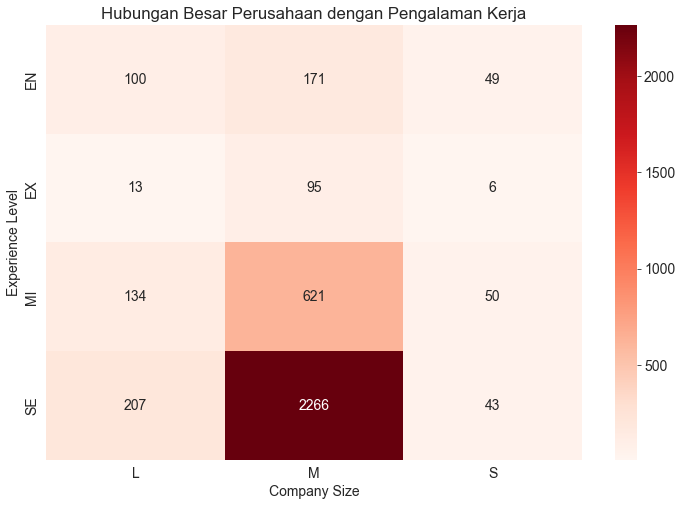

In [22]:
cross_tab = pd.crosstab(data['experience_level'], data['company_size'])

# Heatmap dengan cross-tabulation data
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Reds')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Hubungan Besar Perusahaan dengan Pengalaman Kerja');

### **Data Summary**

In [23]:
plt.style.use('seaborn-v0_8')
data_eda = pd.read_csv("ds_salaries.csv")

In [24]:
def summary(data):
    print(f"Dataset has {data.shape[1]} features and {data.shape[0]} examples.")
    summary = pd.DataFrame(index=data.columns)
    summary["Unique"] = data.nunique().values
    summary["Missing"] = data.isnull().sum().values
    summary["Duplicated"] = data.duplicated().sum()
    summary["Types"] = data.dtypes
    return summary

summary(data_eda)

Dataset has 11 features and 3755 examples.


,Unique,Missing,Duplicated,Types
work_year,4,0,1171,int64
experience_level,4,0,1171,object
employment_type,4,0,1171,object
job_title,93,0,1171,object
salary,815,0,1171,int64
salary_currency,20,0,1171,object
salary_in_usd,1035,0,1171,int64
employee_residence,78,0,1171,object
remote_ratio,3,0,1171,int64
company_location,72,0,1171,object


#### Penghasilan Maksimum
Staff **Data Scientist** adalah judul pekerjaan yang mendapatkan gaji tertinggi. Dia memiliki tingkat pengalaman SE (Senior Level). Mengejutkannya, jenis pekerjaan bukan penuh waktu, melainkan paruh waktu, dan dia bekerja secara remote 100%. Karena gaji merupakan jumlah total gaji kotor yang dibayarkan, maka jumlahnya terlihat cukup tinggi.

In [25]:
data_eda.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

#### Banyak Tech Startup

Data menunjukkan bahwa banyak yang bekerja pada perusahaan berukuran medium.

In [26]:
# membuat plot pie chart
fig = px.pie(data_eda, title="comapny_size", names="company_size")
fig.show()

#### Mayoritas Pekerjaan adalah Data Engineer

<Axes: xlabel='count', ylabel='job_title'>

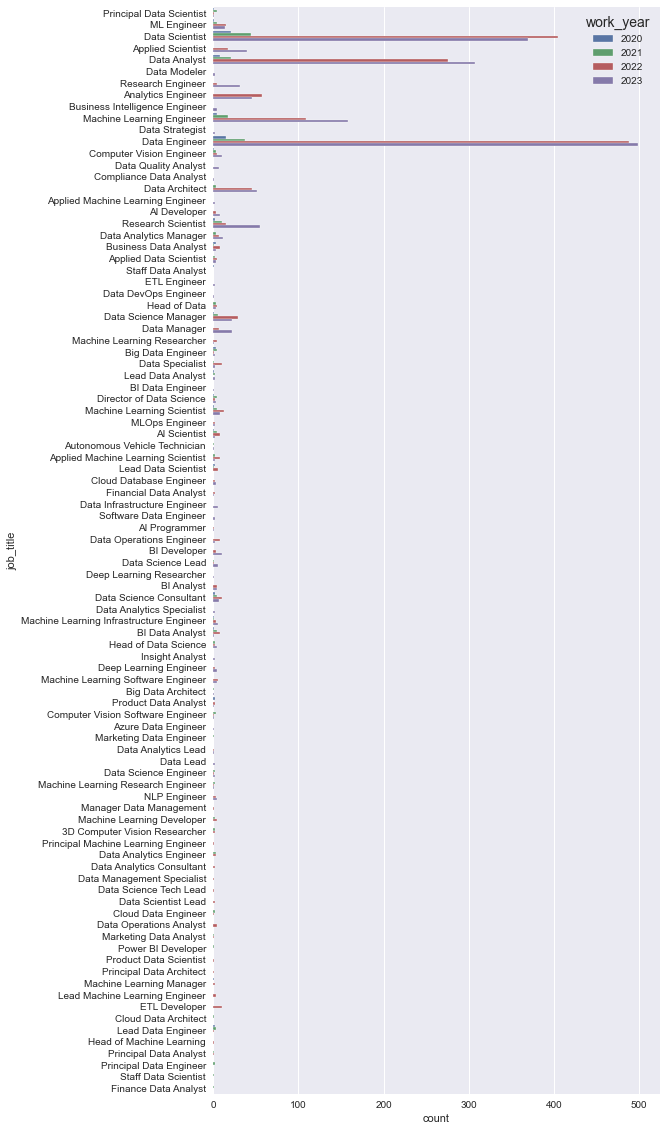

In [27]:
plt.figure(figsize=(8,20))
sns.countplot(data=data_eda, y="job_title", hue="work_year")

In [28]:
# sebuah fungsi untuk menemukan country name
def do_search(country_code):
    try:
        result = pycountry.countries.get(alpha_2=country_code)
    except Exception:
        return np.nan
    else:
        return result.name

# membandingkan pycountry dengan data kode country ISO pada dataset
data_eda["country"] = data_eda["company_location"].apply(lambda country_code: do_search(country_code))
data_eda.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada


#### Mayoritas Data Science berada di Amerika Serikat dan Sudah Berpengalaman atau Senior

<Axes: xlabel='count', ylabel='country'>

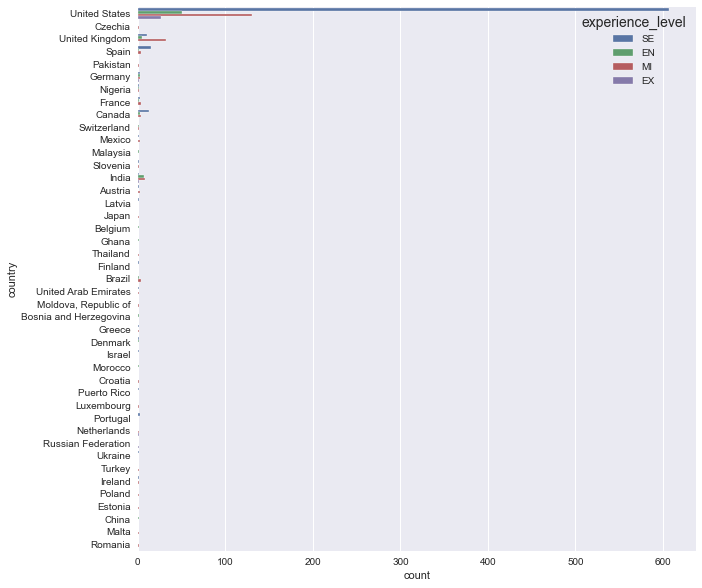

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(data=data_eda.sample(1000), y="country", hue="experience_level")

#### Mayoritas Perusahaan berada di Amerika Serikat, Remote Working adalah Hal yang Populer

<Axes: xlabel='count', ylabel='country'>

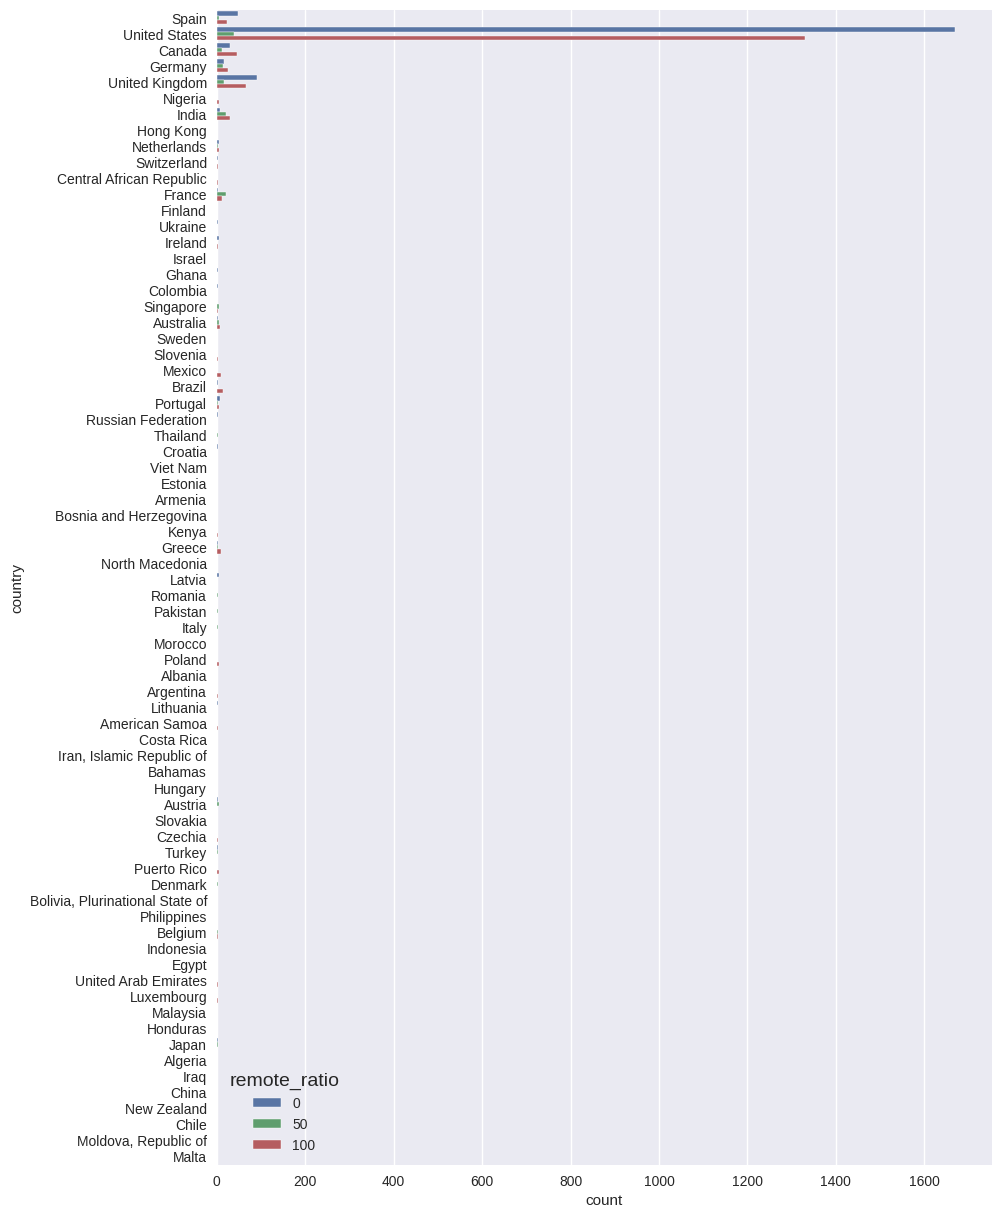

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=data_eda, y="country", hue="remote_ratio")

#### Perusahaan Papan Atas Membagi Penghasilan berdasarkan Pengalaman Kerja

<Axes: xlabel='experience_level', ylabel='count'>

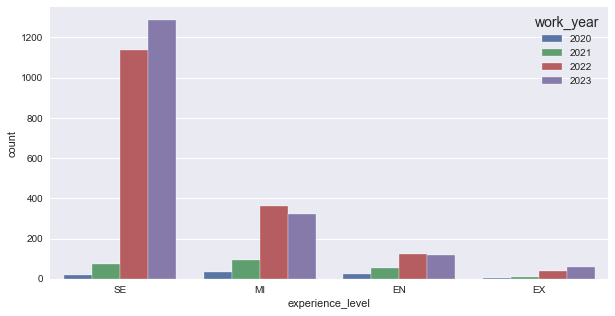

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=data_eda, x="experience_level", hue="work_year")

## Beberapa Hal mengenai Dataset Data Science

#### Bukti yang jelas terlihat dari dataset kami adalah bahwa Data Science merupakan bidang yang mengalami pertumbuhan selama beberapa tahun terakhir.

In [31]:
work_year = data.work_year.value_counts()
work_year

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

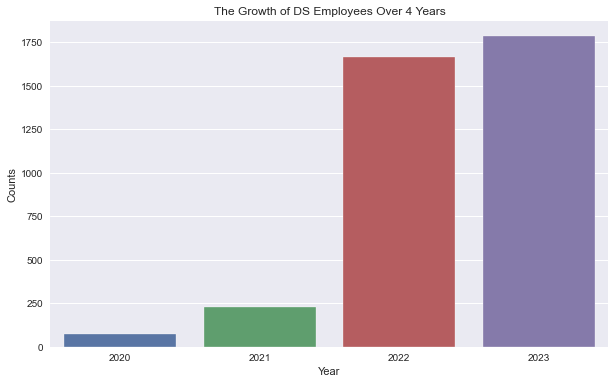

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=0)
plt.title("The Growth of DS Employees Over 4 Years")
plt.ylabel('Counts')
plt.xlabel('Year')

sns.barplot(y=work_year.values, x= work_year.index);

Jumlah pekerja dalam bidang data science terus meningkat seiring waktu.

#### Pertumbuhan gaji karyawan di bidang Data Science bersifat linear

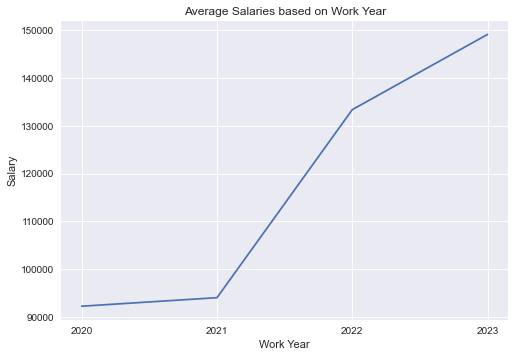

In [33]:
year_salary=data['salary_in_usd'].groupby(data['work_year']).mean()

plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_salary);

Rata-rata penghasilan Data Scientist terus meningkat.

#### Tingkat pengalaman mempengaruhi gaji dalam bidang Data Science

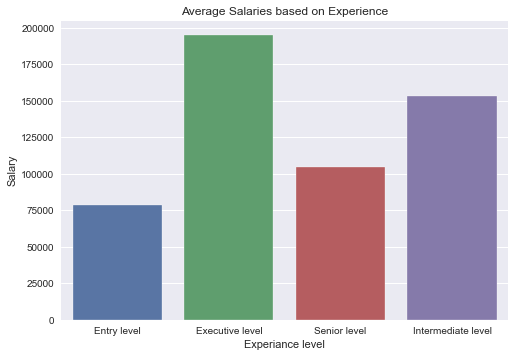

In [34]:
exp_salary=data['salary_in_usd'].groupby(data['experience_level']).mean()

plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_salary.values);

Urutan gaji berdasarkan pengalaman: Entry level, Senior level, Intermediate level, Executive level

#### Urutan jenis-jenis pekerjaan berdasarkan gaji

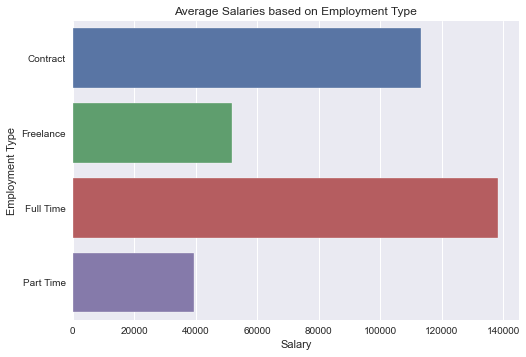

In [35]:
data['salary_in_usd'].groupby(data['employment_type']).mean()

employ_type_salary=data['salary_in_usd'].groupby(data['employment_type']).mean()
plt.title("Average Salaries based on Employment Type")
plt.ylabel('Employment Type')
plt.xlabel('Salary')
sns.barplot(y=['Contract', 'Freelance', 'Full Time', 'Part Time'],x=employ_type_salary.values);

Of course the "full-time" type is the highest salary of the other types.

#### Urutan negara-negara yang memiliki dominasi dalam jumlah perusahaan Data Science

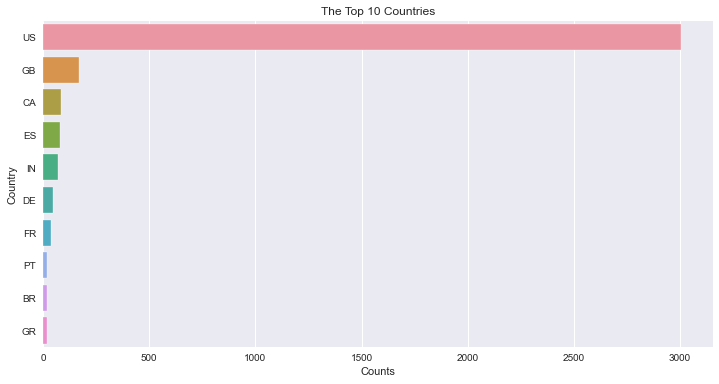

In [36]:
countries = data.employee_residence.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("The Top 10 Countries")
plt.ylabel('Country')
plt.xlabel('Counts')

sns.barplot(y=countries.index, x= countries.values);

The United States has the highest number of companies hiring data science employees

## Kesimpulan


Data Science adalah salah satu bidang yang paling banyak diminati dan berkembang pesat di dunia. Dalam proyek ini, kami membahas secara detail gaji di bidang ilmu data. Ketika kita melihat grafiknya, kita dapat melihat bahwa popularitas ilmu data terus meningkat.

# TENSORFLOW

Instalasi library sklearn untuk membantu Preprocessing Data, Pembagian Data, Machine Learning, dan melakukan evaluasi terhadap kinerja model yang dibangun

In [ ]:
%pip install sklearn

# Melakukan Training pada model menggunakan TensorFlow

## Label Encoding dan Pembagian Data:
- Menentukan kolom-kolom yang akan dilakukan label encoding dalam variabel `cols`.
- Melakukan label encoding pada kolom-kolom yang telah ditentukan dalam dataframe `data`.
- Membentuk variabel `X` dan `y` dengan memisahkan kolom target "salary_in_usd" dari kolom-kolom lainnya.
- Membagi data menjadi data latih dan data uji menggunakan `train_test_split`.


In [38]:
# Import library yang diperlukan:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Menentukan kolom yang akan di-label encoding
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
# Melakukan label encoding pada kolom yang telah ditentukan:
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

# Membentuk variabel X dan y:
X = data.drop(["salary_in_usd"], axis=1)
y = data["salary_in_usd"]

# Membagi data menjadi data latih dan data uji dengan ukuran uji sebesar 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi mengenai dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int32
 2   employment_type     3755 non-null   int32
 3   job_title           3755 non-null   int32
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int32
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int32
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int32
 10  company_size        3755 non-null   int32
dtypes: int32(7), int64(4)
memory usage: 220.1 KB


In [39]:
#Menampilkan beberapa baris pertama
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1



Membuat, melakukan compile, dan melatih model

## Pembentukan Model dan Pelatihan:
- Menggunakan library `tensorflow.keras` untuk pembentukan model dan pemodelan.
- Membentuk model Sequential dengan beberapa layer Dense dan fungsi aktivasi relu.
- Mengompilasi model dengan optimizer Adam dan loss function MAE (Mean Absolute Error).
- Melatih model menggunakan data latih selama 100 epoch.

In [40]:
# Mengatur seed untuk reproduktibilitas:
tf.random.set_seed(42)

# Membuat model Sequential pada TensorFlow:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Mengompilasi model dengan loss function "mean absolute error" (mae), optimizer Adam, dan metrik "mae":
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Melatih model dengan data latih selama 100 epoch:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 91321.9922 - mae: 91321.9922
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 57497.6367 - mae: 57497.6367
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 57271.9883 - mae: 57271.9883
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 57077.8789 - mae: 57077.8789
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 57307.8047 - mae: 57307.8047
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 56728.2773 - mae: 56728.2773
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 56517.7109 - mae: 56517.7109
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 56461.3086 - mae: 56461.3086
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 57018.9492 - mae: 57018.9492
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 56762.16

## Visualisasi Loss dan Prediksi:
- Menampilkan kurva loss history menggunakan `pd.DataFrame(history.history).plot()`.
- Melakukan prediksi pada data uji menggunakan model yang telah dilatih.
- Mengubah hasil prediksi menjadi array 1 dimensi menggunakan `np.ravel()`.
- Menyiapkan data aktual dan hasil prediksi dalam format yang sesuai menggunakan `pd.DataFrame`.
- Mengurutkan data sebelum melakukan plotting.
- Menampilkan hasil akhir berupa plot data aktual dan hasil prediksi menggunakan `plt.plot()`.

<Axes: >

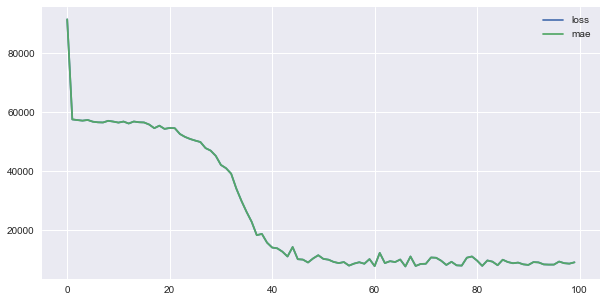

In [41]:
# Menampilkan kurva loss dari proses pelatihan model:
pd.DataFrame(history.history).plot(figsize=(10,5))

##### Membuat Prediction

In [42]:
# Melakukan prediksi terhadap data uji:
prediction = model.predict(X_test)

24/24 [==============================] - 0s 1ms/step


##### Konversi menjadi 1-dimensional array

Melakukan konversi menjadi 1-dimensional array untuk melakukan kalkulasi pada metrics apapun.<br>
Menggunakan fungsi ravel() dari Numpy:

In [43]:
prediction = np.ravel(prediction)

##### Plot hasil prediction

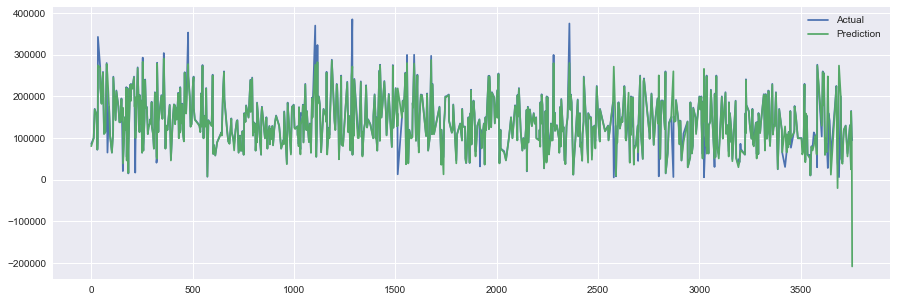

In [44]:
# Menyiapkan data untuk plot hasil prediction dan data aktual:
data_final = pd.DataFrame({"Y_test": y_test , "Prediction" : prediction})

# Mengurutkan indeks sebelum melakukan plot:
data_final = data_final.sort_index()

# Melakukan plot hasil prediksi dan data aktual:
plt.figure(figsize= (15,5))
plt.plot(data_final)
plt.legend(["Actual" , "Prediction"])

# ANOVA

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
formula = "salary ~ work_year + experience_level + employment_type + company_size"
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq      df          F        PR(>F)
work_year         1.068079e+13     1.0  24.053113  9.769081e-07
experience_level  2.453187e+10     1.0   0.055246  8.141874e-01
employment_type   7.758687e+10     1.0   0.174725  6.759698e-01
company_size      1.312494e+13     1.0  29.557331  5.774837e-08
Residual          1.665189e+15  3750.0        NaN           NaN


Dengan significance level = 0.05, beberapa kesimpulan yang dapat diambil ialah

<ol>
  <li>Experience Level: P-Value yang didapat (PR(>F)) adalah 0.81, yang mana lebih tinggi dari significance level. Hal ini menunjukkan bahwa tidak ada bukti kuat tentang keterhubungan besar gaji dengan experience level</li>
  <li>Employment Type: P-Value yang didapat adalah 0.68. Oleh karena itu, Hal ini menunjukkan bahwa tidak ada bukti kuat tentang keterhubungan besar gaji dengan employment_type level.</li>
  <li>Company Size: P-Value yang didapat sangat rendah, yaitu 5.77e-8. Hal ini menunjukkan besaran gaji sangat terhubung dengan company_size</li>
  <li>Work Year: P-Value yang didapat adalah 9.77e-7. Hal ini menunjukkan besaran gaji memiliki hubungan dengan work year, tetapi tidak seterhubung company size</li>
</ol>

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
df_copy = data
print(df_copy)

      work_year  experience_level  employment_type  job_title   salary  \
0          2023                 3                2         84    80000   
1          2023                 2                0         66    30000   
2          2023                 2                0         66    25500   
3          2023                 3                2         47   175000   
4          2023                 3                2         47   120000   
...         ...               ...              ...        ...      ...   
3750       2020                 3                2         47   412000   
3751       2021                 2                2         84   151000   
3752       2020                 0                2         47   105000   
3753       2020                 0                0         17   100000   
3754       2021                 3                2         45  7000000   

      salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0                   7          85847 

In [49]:
# Drop irrelevant columns
df_copy = df_copy.drop(['salary_currency', 'salary_in_usd', 'employee_residence', 'company_location'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df_copy['employment_type'] = label_encoder.fit_transform(df_copy['employment_type'])
df_copy['job_title'] = label_encoder.fit_transform(df_copy['job_title'])

# Convert 'work_year' and 'experience_level' to numeric values
df_copy['work_year'] = pd.to_numeric(df_copy['work_year'], errors='coerce')
df_copy['experience_level'] = pd.to_numeric(df_copy['experience_level'], errors='coerce')

# Drop any rows with missing values
df_copy = df_copy.dropna()

In [50]:
X = df_copy.drop('salary', axis=1)
y = df_copy['salary']

# Split the df_copy
# into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X_test, y_test)
print("R-squared:", r2)


Mean Squared Error: 159808271440.22845
R-squared: 0.021092211170406716
